In [1]:
import numpy as np 
import h5py
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow import keras 
from keras import layers 

In [24]:
train_data = h5py.File("datasets/train_happy.h5","r")
test_data = h5py.File("datasets/test_happy.h5","r")
x_train = np.array(train_data["train_set_x"])
x_test = np.array(test_data["test_set_x"])
y_train = np.array(train_data["train_set_y"])#.reshape(1,-1)
y_test = np.array(test_data["test_set_y"])#.reshape(1,-1)

In [4]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((600, 64, 64, 3), (150, 64, 64, 3), (600,), (150,))

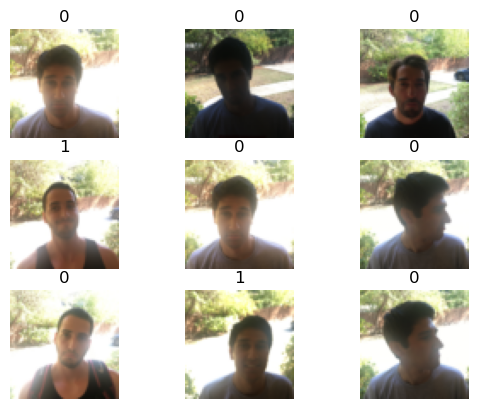

In [79]:
for i in range(9):
    j = np.random.randint(0,49)
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[j])
    plt.axis("off")
    plt.title(str(y_test[j]))

In [15]:
#np.random.shuffle(x_train)

In [6]:
# x_dev = x_test_dev[50:]
# y_dev = y_test_dev[50:]
# x_test = x_test_dev[:49]
# y_test = y_test_dev[:49]

In [16]:
#np.random.shuffle(x_dev)
#np.random.shuffle(x_test)

In [16]:
#x_test.shape , y_test.shape 

((150, 64, 64, 3), (150,))

In [25]:
x_train = x_train/ 255 
# #x_dev = x_dev/255 
x_test =x_test/ 255 

In [26]:
del model 

In [27]:
model = keras.Sequential([# we use alexnet_7 architecture 
    layers.Conv2D(16,7,activation="relu",input_shape=(64,64,3)),
    layers.MaxPooling2D(2),
    layers.Conv2D(32,5,activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(1)#,activation="sigmoid"
])

In [33]:
model.compile(
    optimizer = keras.optimizers.Adam(0.0001),
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [29]:
best_save_callback = keras.callbacks.ModelCheckpoint(
    'tmp/ckpt1/checkpoint.weights.keras',
    save_weiths_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose = 1 
)

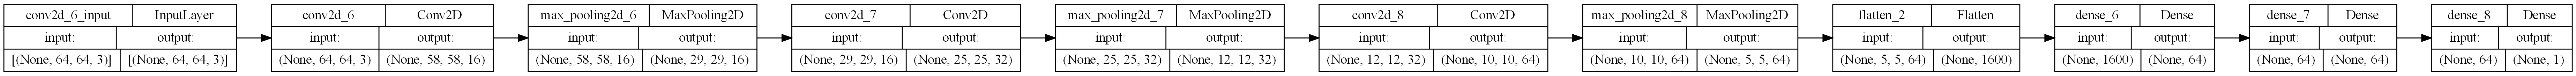

In [30]:
keras.utils.plot_model(model,show_shapes=True,dpi=200,rankdir="LR")

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 58, 58, 16)        2368      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 29, 29, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        12832     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)         

In [34]:
history_1 = model.fit(x_train,y_train,epochs=60,batch_size=16,validation_data=(x_test,y_test),callbacks=[best_save_callback],shuffle=True)

Epoch 1/60
37/38 [============================>.] - ETA: 0s - loss: 0.0103 - accuracy: 0.9983
Epoch 1: val_accuracy did not improve from 0.96000
38/38 [==============================] - 2s 21ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.2585 - val_accuracy: 0.9467
Epoch 2/60
38/38 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9983
Epoch 2: val_accuracy did not improve from 0.96000
38/38 [==============================] - 2s 42ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.2436 - val_accuracy: 0.9467
Epoch 3/60
38/38 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9983
Epoch 3: val_accuracy did not improve from 0.96000
38/38 [==============================] - 4s 103ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.2270 - val_accuracy: 0.9400
Epoch 4/60
38/38 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9983
Epoch 4: val_accuracy did not improve from 0.96000
38/38 [======================

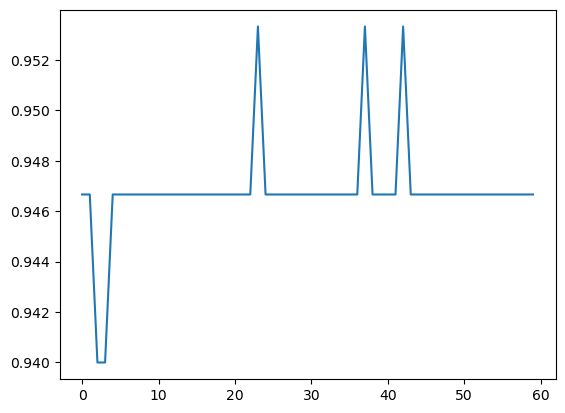

In [35]:
plt.plot(history_1.history["val_accuracy"])

In [36]:
model.load_weights('tmp/ckpt1/checkpoint.weights.keras')

In [37]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 8ms/step - loss: 0.2105 - accuracy: 0.9600


[0.21045631170272827, 0.9599999785423279]

In [81]:
#"images/smile.jpg"
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
def img_p(path):
    img = image.load_img(path,target_size=(64,64,3))
    plt.imshow(img)
    x = image.img_to_array(img)
    #x = x /255 
    x = preprocess_input(x)
    return np.expand_dims(x,axis=0) 
    

In [ ]:
x = img_p("images/smile.jpg")

In [83]:
layers.Softmax()(model.predict(x))

1/1 [==============================] - 0s 22ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [84]:
model.predict(x)

1/1 [==============================] - 0s 22ms/step


array([[303.40186]], dtype=float32)

In [85]:
tf.math.sigmoid(model.predict(x))

1/1 [==============================] - 0s 23ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
y = img_p("images/frown.jpg")

In [87]:
tf.math.sigmoid(model.predict(y))

1/1 [==============================] - 0s 22ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
z = img_p("images/really_frown.jpg")

In [89]:
tf.math.sigmoid(model.predict(z))

1/1 [==============================] - 0s 25ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
k = img_p("images/1.jpg")
tf.math.sigmoid(model.predict(k))

probably my own images have some of the mein feature from the training set so model cant detect sadness from happiness